In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"
%cd /content/gdrive/MyDrive/Kaggle


Mounted at /content/gdrive
/content/gdrive/MyDrive/Kaggle


In [ ]:
survey=pd.read_csv('/content/gdrive/My Drive/Kaggle/LED.csv')
print(survey.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [ ]:
target_price = survey["Adult Mortality"]
print(target_price)
Infant_deaths = survey['infant deaths']
life_Expectancy = survey['Life expectancy ']

0       263.0
1       271.0
2       268.0
3       272.0
4       275.0
        ...  
2933    723.0
2934    715.0
2935     73.0
2936    686.0
2937    665.0
Name: Adult Mortality, Length: 2938, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


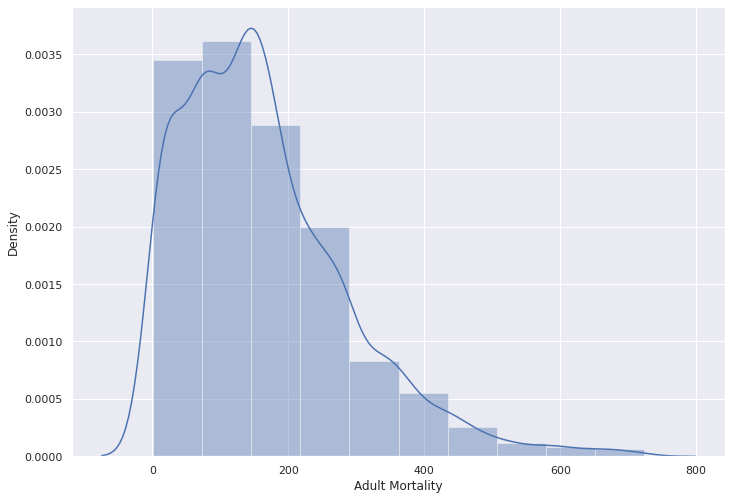

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(survey['Adult Mortality'], bins=10)
plt.show()

                                 Year  Life expectancy   Adult Mortality  \
Year                             1.00              0.17            -0.08   
Life expectancy                  0.17              1.00            -0.70   
Adult Mortality                 -0.08             -0.70             1.00   
infant deaths                   -0.04             -0.20             0.08   
Alcohol                         -0.05              0.40            -0.20   
percentage expenditure           0.03              0.38            -0.24   
Hepatitis B                      0.10              0.26            -0.16   
Measles                         -0.08             -0.16             0.03   
 BMI                             0.11              0.57            -0.39   
under-five deaths               -0.04             -0.22             0.09   
Polio                            0.09              0.47            -0.27   
Total expenditure                0.09              0.22            -0.12   
Diphtheria  

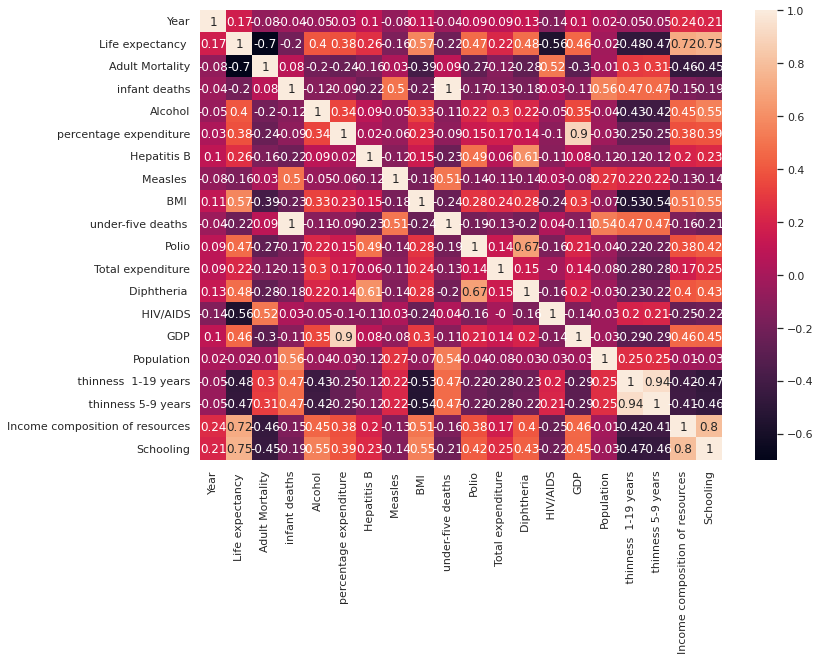

In [ ]:
correlation_matrix = survey.corr().round(2)
print(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [ ]:
X = pd.DataFrame(np.c_[survey['infant deaths'], survey['Life expectancy ']], columns = ['infant deaths','Life expectancy '])
y = survey['Adult Mortality']
print(X)
print(X.dtypes)
print(y.dtypes)

      infant deaths  Life expectancy 
0              62.0              65.0
1              64.0              59.9
2              66.0              59.9
3              69.0              59.5
4              71.0              59.2
...             ...               ...
2933           27.0              44.3
2934           26.0              44.5
2935           25.0              44.8
2936           25.0              45.3
2937           24.0              46.0

[2938 rows x 2 columns]
infant deaths       float64
Life expectancy     float64
dtype: object
float64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 10, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2928, 2)
(10, 2)
(2928,)
(10,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_test, Y_test)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

# model evaluation for training set
y_test_predict = model.predict(X_test)
testPred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 75.95143484688705
R2 score is 0.010747115080723346


The model performance for testing set
--------------------------------------
RMSE is 5768.620455300928
R2 score is 0.010747115080723346


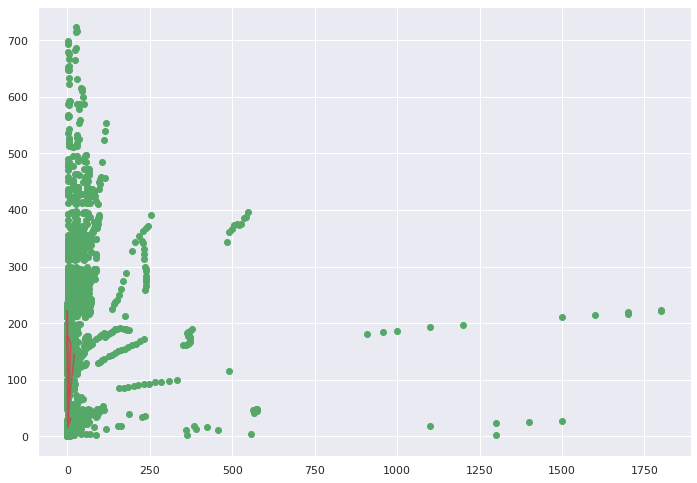

In [ ]:
plt.scatter(X_train['infant deaths'], Y_train,color='g') 
plt.plot(X_test['infant deaths'],Y_test, color="r")
plt.show()

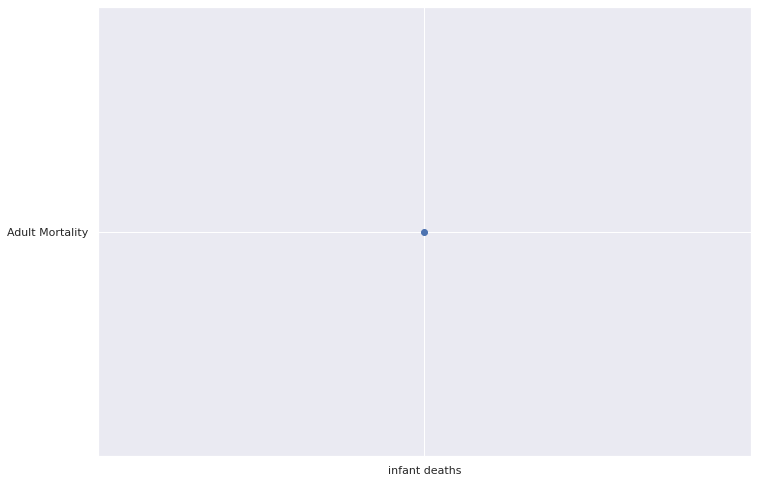

In [ ]:
plt.scatter('infant deaths','Adult Mortality')
plt.show()